In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [2]:
batch_size = 128 #1回で取り出す画像数(1回に、128枚の画像をとりだす) サイズを大きくすると計算が速い
num_class = 10 #分類するクラス数（0~9の数字）
epochs = 20 #60000枚の画像全て入力が完了するとepoch数は「1」、過学習→減らす、未学習(未収束)→増やす

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

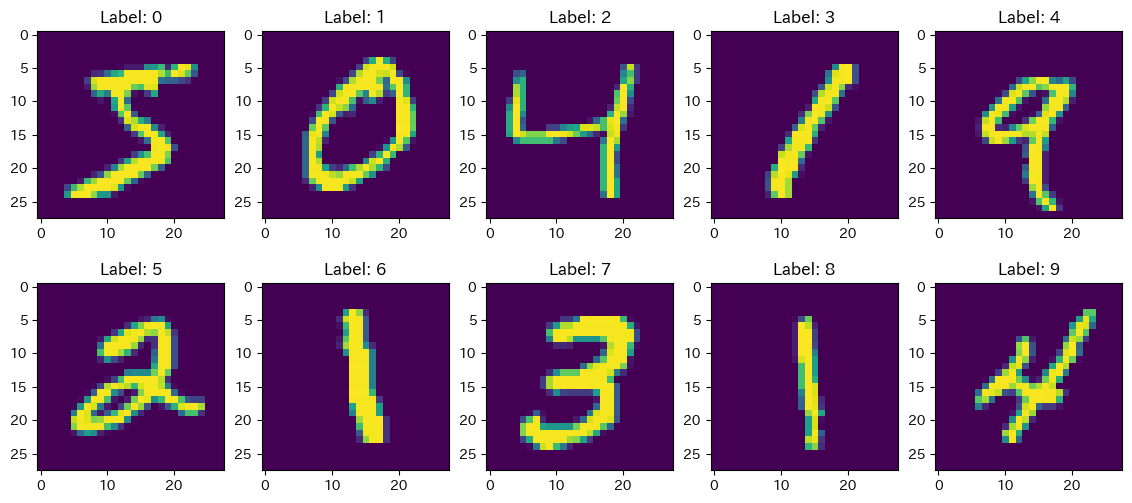

In [4]:
plt.figure(figsize=(14,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.title("Label: " + str(i))
  plt.imshow(X_train[i].reshape(28,28))
  # plt.tight_layout()

In [5]:
X_train,X_test  = X_train/255.0, X_test/255.0

In [6]:
# model = keras.models.Sequential([
#   keras.layers.Flatten(),
#   keras.layers.Dense(512,activation='relu'),
#   keras.layers.Dropout(0.2),
#   keras.layers.Dense(10,activation='softmax') # 1分類:sygmoid 多クラス:softmax
# ])

model = keras.models.Sequential()
model.add(keras.layers.Flatten())
# model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='softmax')) # 1分類:sygmoid 多クラス:softmax

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2216 - accuracy: 0.9342
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0973 - accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0695 - accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0533 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0447 - accuracy: 0.9852


In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9795


[0.06672556698322296, 0.9794999957084656]

In [10]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

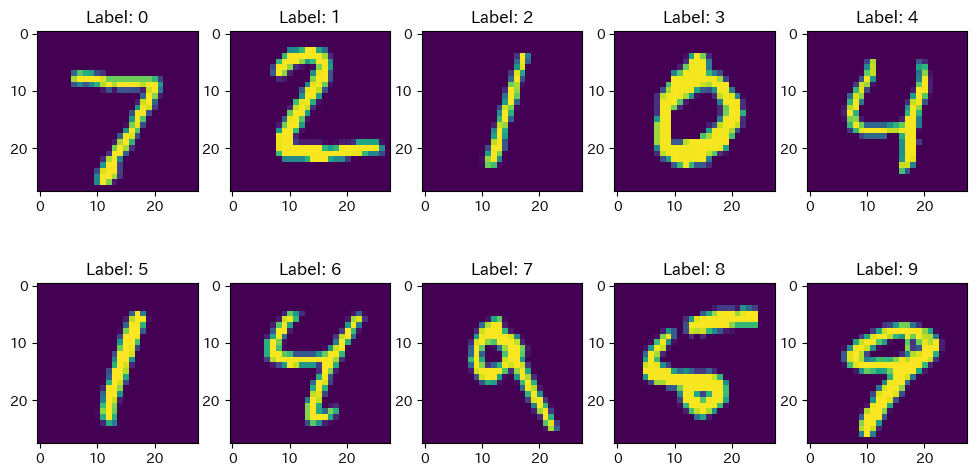

In [13]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.title("Label: " + str(i))
  plt.imshow(X_test[i].reshape(28,28),cmap=None)

In [14]:
predict_test = model.predict(X_test[0:10])

1/1 [==============================] - 0s 88ms/step
[[1.78872071e-07 2.29896191e-08 1.49760965e-07 3.58506331e-05
  1.36570699e-10 2.39622294e-10 1.11066295e-11 9.99947906e-01
  5.31240687e-08 1.58283838e-05]
 [1.75800086e-11 1.32429648e-06 9.99998689e-01 1.67959904e-08
  8.21277604e-18 2.90144331e-09 7.15264958e-10 7.24229162e-14
  4.23869606e-09 1.51408207e-14]
 [2.46559875e-08 9.99915719e-01 9.95277151e-06 1.34788962e-07
  4.09461290e-06 1.60825007e-08 4.12018551e-07 3.86497231e-05
  3.09842144e-05 2.67378493e-08]
 [9.99970198e-01 1.19058479e-08 9.62215040e-07 3.49383491e-08
  2.90634830e-07 3.41348141e-07 2.59832123e-05 6.13610638e-08
  1.71534409e-09 2.13181124e-06]
 [8.15714518e-09 5.46385215e-10 1.90007281e-08 7.59815613e-11
  9.99794900e-01 3.58152064e-09 6.61950406e-09 5.16723412e-06
  2.31936514e-09 1.99955626e-04]
 [2.04413775e-09 9.99835491e-01 1.92656117e-07 1.82040214e-08
  3.63115919e-06 2.99048529e-11 2.13834328e-09 1.44441830e-04
  1.62086289e-05 1.62549192e-08]
 [1.59